In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
indicators = pd.read_csv("dataset/Indicators.csv")

In [3]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Seleziono l'indicatore di mio interesse


In [4]:
indic_list = ['SP.POP.TOTL']
indicators = indicators[indicators.IndicatorCode.isin(indic_list)]

In [5]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08


### Faccio il pivoting in modo da avere 3 colonne, Valore dell'indicatore, CountryCode e Year

In [6]:
indicators2 = indicators.pivot(columns='IndicatorCode', values=['Value','CountryCode','Year'])

In [7]:
indicators2.shape


(13484, 3)

In [8]:
indicators2.head(10)

,Value,CountryCode,Year
IndicatorCode,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL
73,9.24959e+07,ARB,1960
150,4.19081e+06,CSS,1960
221,9.14016e+07,CEB,1960
341,1.04248e+09,EAS,1960
462,8.96493e+08,EAP,1960
581,2.65397e+08,EMU,1960
693,6.67489e+08,ECS,1960
783,1.55317e+08,ECA,1960
895,4.09498e+08,EUU,1960


### Rinomino le colonne in modo coerente e più comprensibile

In [9]:
indicators2.columns = [' '.join(col).strip() for col in indicators2.columns.values]

In [10]:
indicators2.columns = [indicators2.columns[0].split()[1], 'CountryCode', 'Year']


In [11]:
indicators2.head()

,SP.POP.TOTL,CountryCode,Year
73,9.24959e+07,ARB,1960
150,4.19081e+06,CSS,1960
221,9.14016e+07,CEB,1960
341,1.04248e+09,EAS,1960
462,8.96493e+08,EAP,1960


In [12]:
indicators2.to_csv(path_or_buf='./part/pop_tot')

### Ripeto le righe sopra PER OGNI indicatore di mio interesse. Terminata la creazione dei csv li ricarico e ne faccio il merge, qui sotto.

In [26]:
birth = pd.read_csv("./part/birth")
life = pd.read_csv("./part/arms_import")
arms = pd.read_csv("./part/life_expect")
rural = pd.read_csv("./part/rural")
urban = pd.read_csv("./part/urban")
mrF = pd.read_csv("./part/mort_rateF")
mrM = pd.read_csv("./part/mort_rateM")

In [27]:
del birth['Unnamed: 0']
del arms['Unnamed: 0']
del life['Unnamed: 0']
del urban['Unnamed: 0']
del rural['Unnamed: 0']
del mrF['Unnamed: 0']
del mrM['Unnamed: 0']

### Come vediamo ci sono delle shape diverse nei nostri DF, di conseguenza quando andremo a mergiare avremo dei NaN.

In [28]:
print('Birth: '+ str(birth.shape[0]) + '. Arms: ' + str(arms.shape[0]) + '. Life:' + str(life.shape[0]) + '. Rural:' + str(rural.shape[0]) + '. Urban:' + str(urban.shape[0]) + '. Mort rate F:' + str(mrF.shape[0])+ '. Mort rate M:' + str(mrM.shape[0]))

Birth: 12485. Arms: 12304. Life:7333. Rural:13374. Urban:13374. Mort rate F:11939. Mort rate M:11939


### Eseguiamo un primo merge, in modo da vedere la forma dell'ouput, e verificare che ci sono dei NaN in entrambe le colonne degli indicatori.

In [29]:
tot = birth.merge(arms, on = ['CountryCode', 'Year'], how = 'outer')

In [30]:
tot.head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN
0,47.697888,ARB,1960,46.847059
1,40.017001,CSS,1960,62.271795
2,19.117435,CEB,1960,67.823762
3,26.362350,EAS,1960,48.298317
4,26.635950,EAP,1960,45.549658


In [31]:
tot[tot['SP.DYN.LE00.IN'].isnull()].head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN
52,28.3,BMU,1960,NaN
117,14.1,IMY,1960,NaN
118,26.9,ISR,1960,NaN
136,23.1,LIE,1960,NaN
342,13.8,IMY,1961,NaN


In [32]:
tot[tot['SP.DYN.CBRT.IN'].isnull()].head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN
12485,NaN,BMU,1965,68.897805
12486,NaN,FRO,1973,74.497561
12487,NaN,FRO,1978,75.985366
12488,NaN,FRO,1986,75.265854
12489,NaN,FRO,1987,75.465854


# Eseguiamo tutti i merge

In [33]:
tot = tot.merge(life, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(urban, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(rural, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(mrF, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(mrM, on = ['CountryCode', 'Year'], how = 'outer')

In [34]:
tot

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA
0,47.697888,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584
1,40.017001,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888
2,19.117435,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873
3,26.362350,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421
4,26.635950,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086
...,...,...,...,...,...,...,...,...,...
13468,NaN,SRB,1985,NaN,NaN,NaN,NaN,107.875400,199.063200
13469,NaN,SRB,1986,NaN,NaN,NaN,NaN,106.232200,201.110600
13470,NaN,SRB,1987,NaN,NaN,NaN,NaN,104.589000,203.158000
13471,NaN,SRB,1988,NaN,NaN,NaN,NaN,104.610400,201.766000


### Riga successiva da eseguire più volte per cambiare l'ordine delle colonne

In [63]:
cols = tot.columns.tolist()
cols = cols[-1:] + cols[:-1]
tot = tot[cols]
tot.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950


In [64]:
tot.to_csv(path_or_buf='./part/partialDF', index=False)

In [65]:
tot = pd.read_csv("./part/partialDF")
tot.shape

(13473, 9)

### Ora carico il dataframe expenditure

In [66]:
expend = pd.read_csv("dataset/datasets_376235_731395_Military Expenditure.csv")

In [67]:
expend.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
expend2 = pd.melt(expend, var_name='Year', value_vars=np.setdiff1d(expend.columns.values, ['Name','Code','Type','Indicator Name']) ,id_vars='Code')
# del expend2['Variable']

In [69]:
expend2.columns = ['CountryCode', 'Year', 'MilitaryExp']

In [70]:
expend2.head()

,CountryCode,Year,MilitaryExp
0,ABW,1960,NaN
1,AFG,1960,NaN
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN


In [71]:
tot.dtypes

CountryCode        object
Year                int64
SP.DYN.LE00.IN    float64
MS.MIL.MPRT.KD    float64
SP.URB.TOTL       float64
SP.RUR.TOTL       float64
SP.DYN.AMRT.FE    float64
SP.DYN.AMRT.MA    float64
SP.DYN.CBRT.IN    float64
dtype: object

In [72]:
tot['Year'] = tot['Year'].astype('str') #where the max length is set at 80 bytes,

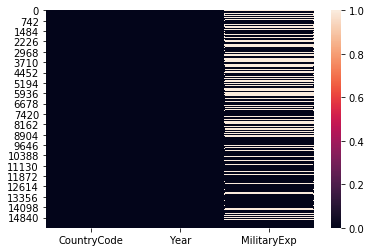

In [73]:
from seaborn import heatmap
heatmap(expend2.isnull())

In [74]:
tot2 = tot.merge(expend2, on = ['CountryCode', 'Year'], how = 'left')
tot2.shape

(13473, 10)

In [75]:
tot2.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN


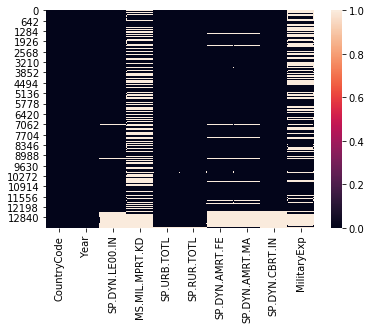

In [76]:
from seaborn import heatmap
heatmap(tot2.isnull())

In [77]:
tot2.to_csv(path_or_buf='./part/partialDF', index=False)

In [78]:
tot2 = pd.read_csv('./part/partialDF')
tot2.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN


### Spiegazione colonne

SP.DYN.LE00.IN: Life expectancy at birth

MS.MIL.MPRT.KD: Arms import

SP.URB.TOTL: Urban population

SP.RUR.TOTL: Rural population

SP.DYN.AMRT.FE: Mortality rate, female

SP.DYN.AMRT.MA: Mortality rate, male

SP.DYN.CBRT.IN: Birth rate (per 1000 people)


In [79]:
dens = pd.read_csv('./part/density')

In [80]:
dens.head()

,CountryCode,Year,Density
0,ARB,1960,-9.249590e+07
1,CSS,1960,-4.190810e+06
2,CEB,1960,-9.140158e+07
3,EAS,1960,-1.042475e+09
4,EAP,1960,-8.964930e+08


In [81]:
tot3 = tot2.merge(dens, on=['CountryCode','Year'], how='left')

In [82]:
tot3.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN,-9.249590e+07
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN,-4.190810e+06
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN,-9.140158e+07
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN,-1.042475e+09
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN,-8.964930e+08


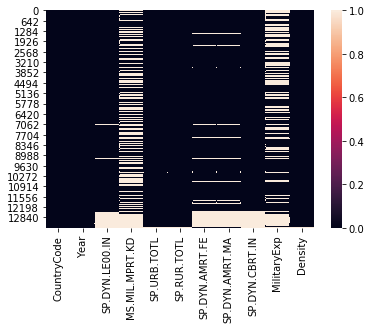

In [83]:
from seaborn import heatmap
heatmap(tot3.isnull())

In [86]:
tot3.dtypes

CountryCode        object
Year                int64
SP.DYN.LE00.IN    float64
MS.MIL.MPRT.KD    float64
SP.URB.TOTL       float64
SP.RUR.TOTL       float64
SP.DYN.AMRT.FE    float64
SP.DYN.AMRT.MA    float64
SP.DYN.CBRT.IN    float64
MilitaryExp       float64
Density           float64
dtype: object

### Now I have to insert the count of all the attacks in one year in one single country.

In [87]:
cnt = pd.read_csv('./part/CC+cnt')

In [88]:
cnt.head()

,CountryCode,cnt
0,AFG,1928.0
1,ALB,4.0
2,DZA,16.0
3,ASM,0.0
4,AND,0.0


In [89]:
tot4 = tot3.merge(cnt, on='CountryCode', how='left')

In [92]:
tot4[tot4.cnt.isnull()]

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density,cnt
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN,-9.249590e+07,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN,-4.190810e+06,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN,-9.140158e+07,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN,-1.042475e+09,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN,-8.964930e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13358,CHI,2014,NaN,NaN,51096.0,111821.0,NaN,NaN,NaN,NaN,-1.629170e+05,NaN
13360,ZAR,2014,NaN,NaN,31430382.0,43446648.0,NaN,NaN,NaN,NaN,-7.487703e+07,NaN
13384,IMY,2014,NaN,NaN,45426.0,41701.0,NaN,NaN,NaN,NaN,-8.712700e+04,NaN
13430,TMP,2014,NaN,NaN,389462.0,822645.0,NaN,NaN,NaN,NaN,-1.212107e+06,NaN


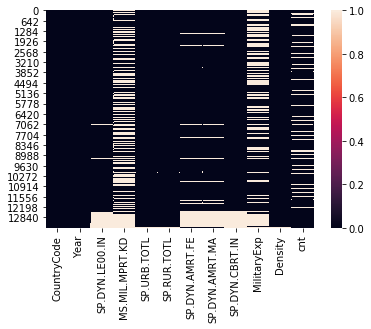

In [90]:
from seaborn import heatmap
heatmap(tot4.isnull())

In [93]:
tot4.to_csv(path_or_buf='./part/DF1sthyp', index=False)